In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys, os

# 🔄 Ajouter src/ au path
sys.path.append(os.path.abspath("../src"))

from covid_connector import get_covid_data

# 📍 Paramètres
country = "Tunisia"
days = 60  # Nombre de jours à récupérer

# 📊 Chargement des données
df = get_covid_data(country, days)

# ✅ Aperçu
print("✅ Données chargées avec succès !")
df.head()


✅ Données chargées avec succès !


c:\projet_stage_ete_2025\src\covid_connector.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


,date,cases,deaths,recovered
0,2023-01-09,1147645,29285,0
1,2023-01-10,1147729,29288,0
2,2023-01-11,1147729,29288,0
3,2023-01-12,1147729,29288,0
4,2023-01-13,1147729,29288,0


C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_8848\722865674.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\projet_stage_ete_2025\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


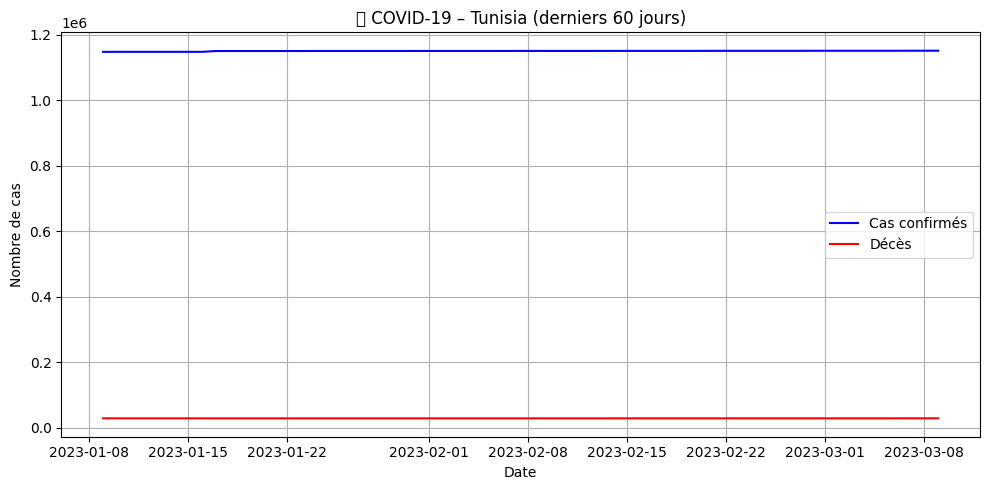

In [2]:
# 📈 Visualisation des cas cumulés (matplotlib)
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["cases"], label="Cas confirmés", color="blue")
plt.plot(df["date"], df["deaths"], label="Décès", color="red")
plt.title(f"📊 COVID-19 – {country} (derniers {days} jours)")
plt.xlabel("Date")
plt.ylabel("Nombre de cas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_8848\1081719874.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\projet_stage_ete_2025\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


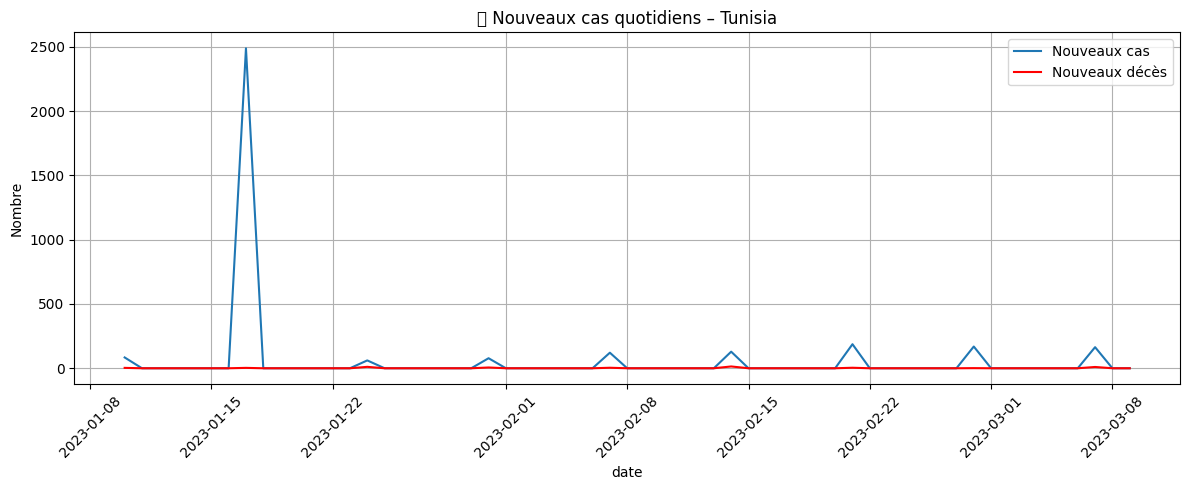

In [3]:
# 🔍 Variation quotidienne (nouvelles infections)
df["new_cases"] = df["cases"].diff()
df["new_deaths"] = df["deaths"].diff()

# 📊 Plot quotidien avec Seaborn
plt.figure(figsize=(12,5))
sns.lineplot(x="date", y="new_cases", data=df, label="Nouveaux cas")
sns.lineplot(x="date", y="new_deaths", data=df, label="Nouveaux décès", color="red")
plt.title(f"📊 Nouveaux cas quotidiens – {country}")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# 🌍 Plot interactif avec Plotly
fig = px.line(df, x="date", y=["cases", "deaths"], title=f"🌐 Cas et décès cumulés – {country}")
fig.update_layout(legend_title_text='Évolution')
fig.show()


In [5]:
# 💡 Comparaison multi-pays rapide (optionnel)
countries = ["Tunisia", "France", "Morocco"]

dfs = []
for c in countries:
    temp = get_covid_data(c, days=30)
    temp["country"] = c
    dfs.append(temp)

df_all = pd.concat(dfs)

# 🔄 Courbes interactives par pays
fig = px.line(df_all, x="date", y="new_cases", color="country",
              title="📈 Nouveaux cas COVID – Comparaison entre pays")
fig.update_layout(xaxis_title="Date", yaxis_title="Nouveaux cas")
fig.show()


c:\projet_stage_ete_2025\src\covid_connector.py:30: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

c:\projet_stage_ete_2025\src\covid_connector.py:30: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

c:\projet_stage_ete_2025\src\covid_connector.py:30: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['date', 'cases', 'deaths', 'recovered', 'country'] but received: new_cases